# Objectives
1. Observe progression of covid-19 by continent and country
2. Investigate whether current level of vaccination is slowing down the spread or not
3. Determine where the vaccine is needed the most by looking at mortality rate

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from matplotlib import pyplot as plt
from collections import Counter, OrderedDict

In [9]:
covid = pd.read_csv(r"C:\Users\taewoo\PycharmProjects\data_professionals\Projects\Datasets\Covid-19 Activity.csv")
covid.info()

c:\users\taewoo\pycharmprojects\data-analysis-practice\venv\interpreter\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687420 entries, 0 to 1687419
Data columns (total 13 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   PEOPLE_POSITIVE_CASES_COUNT      1687420 non-null  int64  
 1   COUNTY_NAME                      1558424 non-null  object 
 2   PROVINCE_STATE_NAME              1585556 non-null  object 
 3   REPORT_DATE                      1687420 non-null  object 
 4   CONTINENT_NAME                   1685516 non-null  object 
 5   DATA_SOURCE_NAME                 1687420 non-null  object 
 6   PEOPLE_DEATH_NEW_COUNT           1687420 non-null  int64  
 7   COUNTY_FIPS_NUMBER               1531768 non-null  float64
 8   COUNTRY_ALPHA_3_CODE             1685516 non-null  object 
 9   COUNTRY_SHORT_NAME               1687420 non-null  object 
 10  COUNTRY_ALPHA_2_CODE             1685040 non-null  object 
 11  PEOPLE_POSITIVE_NEW_CASES_COUNT  1687420 non-null 

In [10]:
covid.head(10)

,PEOPLE_POSITIVE_CASES_COUNT,COUNTY_NAME,PROVINCE_STATE_NAME,REPORT_DATE,CONTINENT_NAME,DATA_SOURCE_NAME,PEOPLE_DEATH_NEW_COUNT,COUNTY_FIPS_NUMBER,COUNTRY_ALPHA_3_CODE,COUNTRY_SHORT_NAME,COUNTRY_ALPHA_2_CODE,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT
0,18046,Kenosha,Wisconsin,2021-04-26,America,New York Times,0,55059.0,USA,United States,US,3,321
1,18096,Kenosha,Wisconsin,2021-04-27,America,New York Times,0,55059.0,USA,United States,US,50,321
2,18123,Kenosha,Wisconsin,2021-04-28,America,New York Times,1,55059.0,USA,United States,US,27,322
3,18148,Kenosha,Wisconsin,2021-04-29,America,New York Times,0,55059.0,USA,United States,US,25,322
4,18163,Kenosha,Wisconsin,2021-04-30,America,New York Times,0,55059.0,USA,United States,US,15,322
5,18188,Kenosha,Wisconsin,2021-05-01,America,New York Times,0,55059.0,USA,United States,US,25,322
6,18212,Kenosha,Wisconsin,2021-05-02,America,New York Times,0,55059.0,USA,United States,US,24,322
7,18212,Kenosha,Wisconsin,2021-05-03,America,New York Times,0,55059.0,USA,United States,US,0,322
8,18239,Kenosha,Wisconsin,2021-05-04,America,New York Times,1,55059.0,USA,United States,US,27,323
9,18251,Kenosha,Wisconsin,2021-05-05,America,New York Times,0,55059.0,USA,United States,US,12,323


### Data Cleansing

In [11]:
# dropping columns that aren't too useful for this analysis
covid.drop(columns=['COUNTY_FIPS_NUMBER', 'DATA_SOURCE_NAME', 'COUNTRY_SHORT_NAME',
                    'COUNTRY_ALPHA_2_CODE', 'COUNTRY_ALPHA_3_CODE'], inplace=True)
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687420 entries, 0 to 1687419
Data columns (total 7 columns):
 #   Column                           Non-Null Count    Dtype 
---  ------                           --------------    ----- 
 0   PEOPLE_POSITIVE_CASES_COUNT      1687420 non-null  int64 
 1   PROVINCE_STATE_NAME              1585556 non-null  object
 2   REPORT_DATE                      1687420 non-null  object
 3   CONTINENT_NAME                   1685516 non-null  object
 4   PEOPLE_DEATH_NEW_COUNT           1687420 non-null  int64 
 5   PEOPLE_POSITIVE_NEW_CASES_COUNT  1687420 non-null  int64 
 6   PEOPLE_DEATH_COUNT               1687420 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 90.1+ MB


In [12]:
covid.isnull().sum()

PEOPLE_POSITIVE_CASES_COUNT             0
PROVINCE_STATE_NAME                101864
REPORT_DATE                             0
CONTINENT_NAME                       1904
PEOPLE_DEATH_NEW_COUNT                  0
PEOPLE_POSITIVE_NEW_CASES_COUNT         0
PEOPLE_DEATH_COUNT                      0
dtype: int64

In [13]:
# since a count of people will always be a whole number, change floats to ints
covid['PEOPLE_POSITIVE_CASES_COUNT'] = covid['PEOPLE_POSITIVE_CASES_COUNT'].astype(int)
covid['PEOPLE_DEATH_NEW_COUNT'] = covid['PEOPLE_DEATH_NEW_COUNT'].astype(int)
covid['PEOPLE_POSITIVE_NEW_CASES_COUNT'] = covid['PEOPLE_POSITIVE_NEW_CASES_COUNT'].astype(int)
covid['PEOPLE_DEATH_COUNT'] = covid['PEOPLE_DEATH_COUNT'].astype(int)

# drop duplicates
covid.drop_duplicates(inplace=True)

# use countryinfo library to get the unknowns and if it's not possible, fill in with 'Unknown'
# ==== add code ====
covid.fillna('Unknown', inplace=True)
covid.isnull().sum()

PEOPLE_POSITIVE_CASES_COUNT        0
PROVINCE_STATE_NAME                0
REPORT_DATE                        0
CONTINENT_NAME                     0
PEOPLE_DEATH_NEW_COUNT             0
PEOPLE_POSITIVE_NEW_CASES_COUNT    0
PEOPLE_DEATH_COUNT                 0
dtype: int64

In [7]:
def provincial_case(df, country):
    '''
    Args:
        df: DataFrame
        country: str
    Returns:
        a list of *confirmed* cases of Covid-19 for each province in the country
    Order:
        Descending
    '''
    country_table = df.loc[df['COUNTRY_SHORT_NAME'] == country]
    province_list = country_table['PROVINCE_STATE_NAME'].unique()
    province_dict = dict()
    for province in province_list:
        province_dict[province] = country_table.loc[country_table['PROVINCE_STATE_NAME'] == province]['PEOPLE_POSITIVE_CASES_COUNT'].max()
    return sorted(province_dict.items(), key=lambda x: x[1], reverse=True)


def country_case(df, country):
    '''
    Args:
        df: DataFrame
        country: str
    Returns:
        a sum of *confirmed* cases of Covid-19 in a country
    '''
    province_list = df.loc[df['COUNTRY_SHORT_NAME'] == country]['PROVINCE_STATE_NAME'].unique()
    total = 0
    for province in province_list:
        total += df.loc[df['PROVINCE_STATE_NAME'] == province]['PEOPLE_POSITIVE_NEW_CASES_COUNT'].sum()
    return (country, total)

### 10 countries with the most positive cases of Covid-19

In [8]:
every_country = covid['COUNTRY_SHORT_NAME'].unique()
country_list = []
for country in every_country:
    country_list.append(country_case(covid, country))
country_list = sorted(country_list, key=lambda x:x[1], reverse=True)

for i in range(10):
    print('Top {} {}'.format(i+1, country_list[i]))

Top 1 ('Andorra', 16136309)
Top 2 ('Burundi', 16136309)
Top 3 ('Turks and Caicos islands', 16136309)
Top 4 ('Iraq', 16136309)
Top 5 ('Cuba', 16136309)
Top 6 ('Faroe Islands', 16136309)
Top 7 ('United Kingdom', 16136309)
Top 8 ('Moldova', 16136309)
Top 9 ('Western Sahara', 16136309)
Top 10 ('Haiti', 16136309)


### Debugging
Every country got the value of **11103968**

Let's examine what's happening.

In [9]:
def country_case(df, country):
    province_list = df.loc[df['COUNTRY_SHORT_NAME'] == country]['PROVINCE_STATE_NAME'].unique()
    print(province_list)

# checking if there's anything in the province column that's causing the problem
print(country_case(covid, 'Uruguay'))
print(country_case(covid, 'Estonia'))
print(country_case(covid, 'South Sudan'))

['Unknown']
None
['Unknown']
None
['Unknown']
None


Found the problem!

The code is summing up cases of all 'Unknown' provinces from the world.

To limit the search to within a country, I need to use a temporary dataframe.

In [10]:
def country_case(df, country):
    '''
    Args:
        df: DataFrame
        country: str
    Returns:
        a sum of *confirmed* cases of Covid-19 in a country
    '''
    country_df = df.loc[df['COUNTRY_SHORT_NAME'] == country]
    province_list = country_df['PROVINCE_STATE_NAME'].unique()
    total = 0
    for province in province_list:
        total += country_df.loc[country_df['PROVINCE_STATE_NAME'] == province]['PEOPLE_POSITIVE_NEW_CASES_COUNT'].sum()
    return (country, total)

country_list = []
for country in every_country:
    country_list.append(country_case(covid, country))
country_list = sorted(country_list, key=lambda x:x[1], reverse=True)
for i in range(10):
    print('Top {} {}'.format(i+1, country_list[i]))

Top 1 ('United States', 5407446)
Top 2 ('Brazil', 3340197)
Top 3 ('India', 2647663)
Top 4 ('Russia', 922853)
Top 5 ('South Africa', 587345)
Top 6 ('Peru', 535946)
Top 7 ('Mexico', 522162)
Top 8 ('Colombia', 468332)
Top 9 ('Chile', 385946)
Top 10 ('Iran', 343203)


Now I got the result that's more probable.

Debugging is done.

Since the *U.S.* is the country with **the most cases**, let's take a look at the continent: America.

Let's sort countries from the most cases to the least.

In [11]:
america = covid.loc[covid['CONTINENT_NAME'] == 'America']['COUNTRY_SHORT_NAME'].unique()
america_list = []
for country in america:
    america_list.append(country_case(covid, country))
print(sorted(america_list, key=lambda x:x[1], reverse=True))

[('United States', 5407446), ('Brazil', 3340197), ('Peru', 535946), ('Mexico', 522162), ('Colombia', 468332), ('Chile', 385946), ('Argentina', 289087), ('Canada', 122087), ('Ecuador', 101542), ('Bolivia', 100344), ('Dominican Republic', 86309), ('Panama', 81940), ('Guatemala', 62562), ('Honduras', 50502), ('Venezuela', 33755), ('Costa Rica', 28465), ('El Salvador', 22912), ('Paraguay', 9791), ('Haiti', 7879), ('Nicaragua', 4115), ('Cuba', 3316), ('Suriname', 3016), ('Uruguay', 1440), ('Bahamas', 1315), ('Jamaica', 1113), ('Aruba', 1102), ('Guyana', 709), ('Trinidad and Tobago', 552), ('Belize', 452), ('Sint Maarten', 317), ('Turks and Caicos islands', 298), ('Cayman Islands', 203), ('Bermuda', 162), ('Barbados', 151), ('Antigua and Barbuda', 93), ('Saint Vincent and the Grenadines', 57), ('Curaçao', 34), ('Saint Lucia', 25), ('Grenada', 24), ('Dominica', 18), ('Saint Kitts and Nevis', 17), ('Greenland', 14), ('Bonaire, Saint Eustatius and Saba', 13), ('Montserrat', 13), ('Falkland Isla

Positive Cases of Covid-19 in all states of the United States

In [12]:
print(provincial_case(covid, 'United States'))

[('New York', 234918), ('California', 221950), ('Florida', 145306), ('Arizona', 129385), ('Illinois', 115960), ('Texas', 92253), ('Nevada', 52867), ('Pennsylvania', 32186), ('Michigan', 29136), ('Massachusetts', 26565), ('Maryland', 25101), ('Tennessee', 25046), ('North Carolina', 23203), ('Wisconsin', 22212), ('Georgia', 21993), ('Utah', 21771), ('New Jersey', 21443), ('Minnesota', 20469), ('Ohio', 19553), ('Connecticut', 18160), ('Washington', 17662), ('Virginia', 16995), ('Indiana', 16796), ('Missouri', 16614), ('Louisiana', 15789), ('Rhode Island', 15644), ('Alabama', 14307), ('District of Columbia', 13220), ('South Carolina', 12879), ('Nebraska', 12140), ('Oklahoma', 11600), ('Iowa', 10983), ('Colorado', 10572), ('Idaho', 9968), ('Kentucky', 9854), ('Delaware', 7524), ('Kansas', 6430), ('Arkansas', 6430), ('Mississippi', 5902), ('New Mexico', 5337), ('Oregon', 5264), ('South Dakota', 4629), ('Hawaii', 4591), ('Puerto Rico', 3991), ('New Hampshire', 3935), ('North Dakota', 3128), (

### Investigating the progression of COVID-19 from Jan - July 2020 by continent
**Goals**
* Group data by continents and time
* Use month as the time measurement unit
* Create a newly reported cases graph

In [13]:
covid['YEAR'] = pd.to_datetime(covid['REPORT_DATE']).dt.year
covid['MONTH'] = pd.to_datetime(covid['REPORT_DATE']).dt.month
continent_new_case = covid[['CONTINENT_NAME', 'PEOPLE_POSITIVE_NEW_CASES_COUNT','YEAR', 'MONTH']].groupby(
                       ['CONTINENT_NAME','YEAR', 'MONTH'], as_index=False).sum()
print(continent_new_case)

   CONTINENT_NAME  YEAR  MONTH  PEOPLE_POSITIVE_NEW_CASES_COUNT
0          Africa  2020      2                                3
1          Africa  2020      3                             5134
2          Africa  2020      4                            31598
3          Africa  2020      5                           104887
4          Africa  2020      6                           251822
5          Africa  2020      7                           516291
6          Africa  2020      8                           209844
7         America  2020      1                               11
8         America  2020      2                               75
9         America  2020      3                           210946
10        America  2020      4                          1113725
11        America  2020      5                          1541502
12        America  2020      6                          2409291
13        America  2020      7                          4114592
14        America  2020      8          

To display all this information on the same graph, let's drop Asia's Dec of 2019 and add Africa's January of 2020.

Then, I can start making graphs

### Positive Cases of each Continent

In [14]:
continent_new_case.drop(index=13, inplace=True)
continent_new_case = continent_new_case.append({'CONTINENT_NAME':'Africa', 'YEAR':2020, 'MONTH':1, 'PEOPLE_POSITIVE_NEW_CASES_COUNT':0}, ignore_index=True)
continent_new_case.sort_values(by=['CONTINENT_NAME', 'MONTH'], inplace=True)
continent_new_case.reset_index(drop=True, inplace=True)

In [15]:
print(continent_new_case[['CONTINENT_NAME', 'MONTH', 'PEOPLE_POSITIVE_NEW_CASES_COUNT']])

   CONTINENT_NAME  MONTH  PEOPLE_POSITIVE_NEW_CASES_COUNT
0          Africa      1                                0
1          Africa      2                                3
2          Africa      3                             5134
3          Africa      4                            31598
4          Africa      5                           104887
5          Africa      6                           251822
6          Africa      7                           516291
7          Africa      8                           209844
8         America      1                               11
9         America      2                               75
10        America      3                           210946
11        America      4                          1113725
12        America      5                          1541502
13        America      6                          2409291
14        America      8                          2285656
15           Asia      1                             9766
16           A

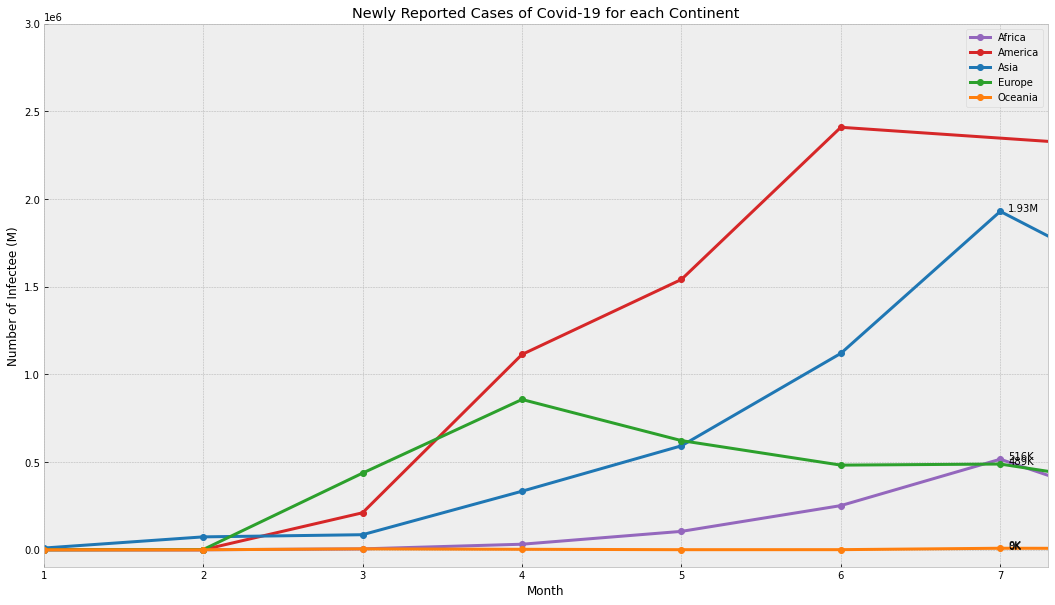

In [16]:
continent_list = continent_new_case['CONTINENT_NAME'].unique()
color_list = ['tab:purple', 'tab:red', 'tab:blue', 'tab:green', 'tab:orange']
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = [18, 10]

# use for loop to create a line graph for each continent
for continent, color in zip(continent_list, color_list):
    plt.plot('MONTH', 'PEOPLE_POSITIVE_NEW_CASES_COUNT', data=continent_new_case.loc[continent_new_case['CONTINENT_NAME']==continent], c=color, label=continent, marker='o', linewidth=3)

# create a list of sum of cases for each continent in July (last month)
max_continent = []
for continent in continent_list:
    max_continent.append(continent_new_case.loc[(continent_new_case['CONTINENT_NAME'] == continent) & 
                                                (continent_new_case['MONTH'] == 7)]['PEOPLE_POSITIVE_NEW_CASES_COUNT'].sum())

# create and position labels
for y in max_continent:
    if y >= 1000000:
        plt.text(7.05, y, str(round(y/1000000, 2)) +'M')
    else:
        plt.text(7.05, y, str(round(y/1000)) +'K')
plt.legend()
plt.ylim(-100000, 3000000)
plt.xlim(1, 7.3)
plt.xlabel('Month')
plt.title('Newly Reported Cases of Covid-19 for each Continent')
plt.ylabel('Number of Infectee (M)')
plt.show()

To be clear each plot **doesn't** represent the sum of previous cases + new cases. It's a quantity of newly reported cases.

* Initially, Asia experienced the fastest growth rate as Wuhan is the place of origin of Covid-19
* The number in Europe spiked up in between February and April then experienced a consistent decline in growth rate
* America started slowly, then has been experiencing the fastest growth rate (it's on-going)
* Growth rates in both Africa and Oceania have been steadily and very slowly increasing

In [17]:
# create a list of total of new cases for each time period
aggregate_cases = []
total = 0
for continent in continent_list:
    for item, new_case in zip(continent_new_case['CONTINENT_NAME'], continent_new_case['PEOPLE_POSITIVE_NEW_CASES_COUNT']):
        if continent == item:
            total += new_case
            aggregate_cases.append(total)
        else:
            total = 0

# add it as a new column
continent_new_case['AGGREGATE_CASES'] = aggregate_cases

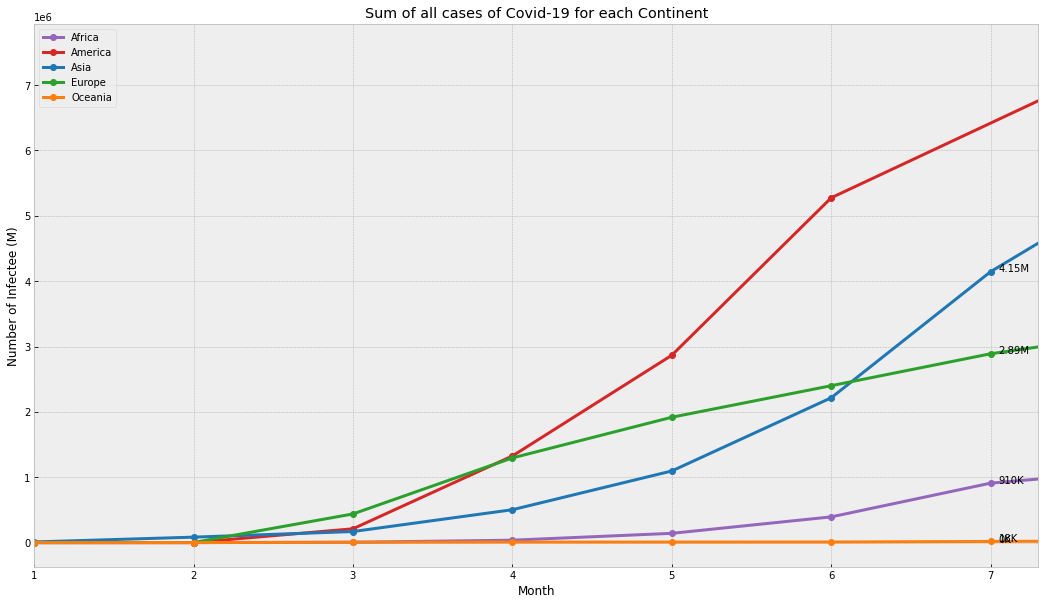

In [18]:
for continent, color in zip(continent_list, color_list):
    plt.plot('MONTH', 'AGGREGATE_CASES', data=continent_new_case.loc[continent_new_case['CONTINENT_NAME']==continent], c=color, label=continent, marker='o', linewidth=3)

max_continent = []
for continent in continent_list:
    max_continent.append(continent_new_case.loc[(continent_new_case['CONTINENT_NAME'] == continent) & 
                                                (continent_new_case['MONTH'] == 7)]['AGGREGATE_CASES'].sum())
for y in max_continent:
    if y >= 1000000:
        plt.text(7.05, y, str(round(y/1000000, 2)) +'M')
    else:
        plt.text(7.05, y, str(round(y/1000)) +'K')
plt.legend()
plt.xlabel('Month')
plt.xlim(1, 7.3)
plt.title('Sum of all cases of Covid-19 for each Continent')
plt.ylabel('Number of Infectee (M)')
plt.show()

* America is by far the *most* dangerous continent to travel in the current state - **fastest growth rate** since March
* Asia and Africa are experiencing a steady increase
* Europe and Oceania are managing to flatten the curves

### Counting Deaths of each Continent

In [19]:
continent_death = covid[['CONTINENT_NAME', 'PEOPLE_DEATH_NEW_COUNT', 'YEAR', 'MONTH']].groupby(
                       ['CONTINENT_NAME','YEAR', 'MONTH'], as_index=False).sum()
continent_death = continent_death.append({'CONTINENT_NAME':'Africa', 'YEAR':2020, 'MONTH':1, 'PEOPLE_DEATH_NEW_COUNT':0}, ignore_index=True)
continent_death.drop(index=13, inplace=True)
continent_death.sort_values(by=['CONTINENT_NAME', 'MONTH'], inplace=True)
continent_death.reset_index(drop=True, inplace=True)

DEATH_AGGREGATE = []
death_count = 0
for continent in continent_list:
    for item, death in zip(continent_death['CONTINENT_NAME'], continent_death['PEOPLE_DEATH_NEW_COUNT']):
        if continent == item:
            death_count += death
            DEATH_AGGREGATE.append(death_count)
        else:
            death_count = 0
continent_death['DEATH_AGGREGATE'] = DEATH_AGGREGATE
print(continent_death)

   CONTINENT_NAME  YEAR  MONTH  PEOPLE_DEATH_NEW_COUNT  DEATH_AGGREGATE
0          Africa  2020      1                       0                0
1          Africa  2020      2                       0                0
2          Africa  2020      3                     166              166
3          Africa  2020      4                    1425             1591
4          Africa  2020      5                    2480             4071
5          Africa  2020      6                    5807             9878
6          Africa  2020      7                    9433            19311
7          Africa  2020      8                    6322            25633
8         America  2020      1                       0                0
9         America  2020      2                       1                1
10        America  2020      3                    4803             4804
11        America  2020      4                   72049            76853
12        America  2020      5                   85196          

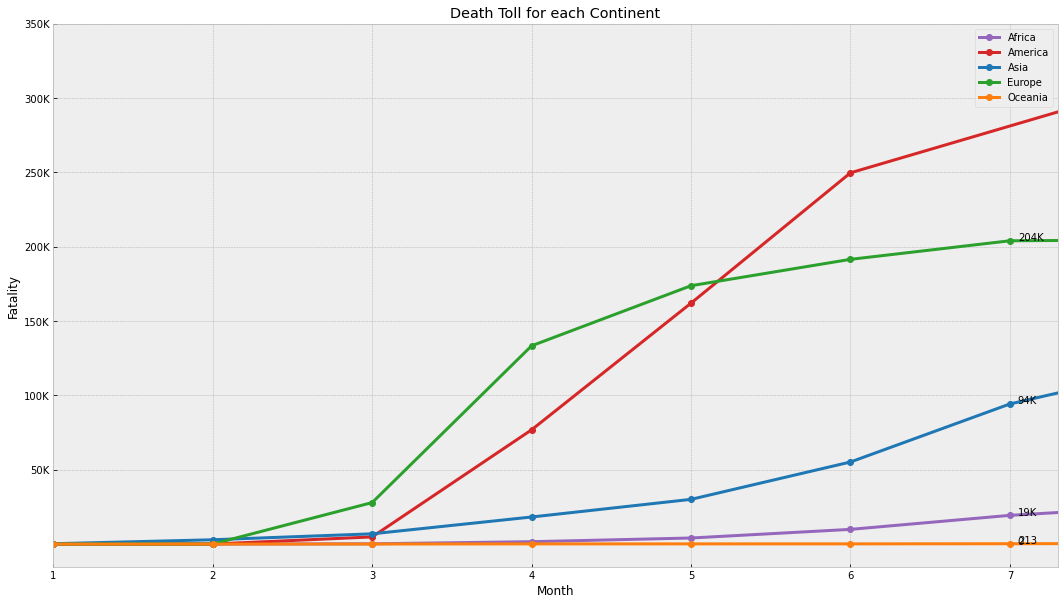

In [20]:
for continent, color in zip(continent_list, color_list):
    plt.plot('MONTH', 'DEATH_AGGREGATE', data=continent_death.loc[continent_death['CONTINENT_NAME']==continent], c=color, label=continent, marker='o', linewidth=3)

max_death = []
for continent in continent_list:
    max_death.append(continent_death.loc[(continent_death['CONTINENT_NAME'] == continent) & 
                                                (continent_death['MONTH'] == 7)]['DEATH_AGGREGATE'].sum())

for y in max_death:
    if y >= 1000:
        plt.text(7.05, y, str(round(y/1000)) +'K')
    else:
        plt.text(7.05, y, str(y))
plt.legend()
plt.xlim(1, 7.3)
plt.xlabel('Month')
plt.title('Death Toll for each Continent')
yticks = [50000, 100000, 150000, 200000, 250000, 300000, 350000]
ylabels = ['50K', '100K', '150K', '200K', '250K', '300K', '350K']
plt.yticks(ticks=yticks, labels=ylabels)
plt.ylabel('Fatality')
plt.show()

* As observed from previous graphs, the decline of Covid-19's positive cases in Europe has resulted in gentler slopes after April
* The extreme growth rate of positive cases in America is reflected by the steep slope on this graph
* Although the total of positive cases in Asia is greater than that of Europe by 80,000, death toll is much lower (it could be the consequence of how well the countries handled the situation)

### Mortality Rate

In [21]:
def death_rate(df, continent):
    '''
    Args:
        df: DataFrame
        header: str or a list of str, a header of a column 
    Return:
         death rate of a continent or an average death rate of continents
    '''
    # if calculating death rate of a continent, find the lastest updates of death and infected population
    if type(continent) == str:
        temp = df.loc[df['CONTINENT_NAME'] == continent]
        return '{}%'.format(round(temp['PEOPLE_DEATH_COUNT'].max()/temp['PEOPLE_POSITIVE_CASES_COUNT'].max()*100, 2))
    # if calculating death rate of continents, find each continent's death rate and find the average
    else:
        death = []
        population = []
        total = 0
        for item in continent:
            death.append(df.loc[df['CONTINENT_NAME'] == item]['PEOPLE_DEATH_COUNT'].max())
            population.append(df.loc[df['CONTINENT_NAME'] == item]['PEOPLE_POSITIVE_CASES_COUNT'].max())
        for d, p in zip(death, population):
            total += d/p*100
        return '{}%'.format(round(total/len(death), 2))

print(death_rate(covid,'Africa'))
print(death_rate(covid,'America'))
print(death_rate(covid,['Africa', 'America']))

2.02%
3.23%
2.62%


In [22]:
for continent in continent_list:
    print(f"Mortality rate of Covid-19 in {continent}: {death_rate(covid, continent)}")
print(f'===============\nAverage mortality rate of Covid-19: {death_rate(covid, continent_list)}')

Mortality rate of Covid-19 in Africa: 2.02%
Mortality rate of Covid-19 in America: 3.23%
Mortality rate of Covid-19 in Asia: 1.92%
Mortality rate of Covid-19 in Europe: 5.06%
Mortality rate of Covid-19 in Oceania: 1.7%
Average mortality rate of Covid-19: 2.79%


*Europe* has recorded the highest mortality rate of **5.77%** while *Oceania* has managed the lowest of **0.99%**.

Overall, the average is **2.88%**, which is considered **not fatal**.

In [23]:
total_all = covid[['MONTH', 'PEOPLE_POSITIVE_NEW_CASES_COUNT', 'PEOPLE_DEATH_NEW_COUNT']].groupby(['MONTH']).sum()
total_all.drop(12, inplace=True)
total_positive_list = []
total_death_list = []
count_positive = 0
count_death = 0
for positive, death in zip(total_all['PEOPLE_POSITIVE_NEW_CASES_COUNT'], total_all['PEOPLE_DEATH_NEW_COUNT']):
    count_positive += positive
    count_death += death
    total_positive_list.append(count_positive)
    total_death_list.append(count_death)
total_all['TOTAL_POSITIVE_CASE'] = total_positive_list
total_all['TOTAL_DEATH'] = total_death_list
print(total_all)

       PEOPLE_POSITIVE_NEW_CASES_COUNT  PEOPLE_DEATH_NEW_COUNT  \
MONTH                                                            
1                                 9799                     213   
2                                74707                    2703   
3                               744304                   36867   
4                              2338922                  190333   
5                              2862173                  139966   
6                              4264401                  136319   
7                              7058092                  168269   
8                              4313417                   94812   

       TOTAL_POSITIVE_CASE  TOTAL_DEATH  
MONTH                                    
1                     9799          213  
2                    84506         2916  
3                   828810        39783  
4                  3167732       230116  
5                  6029905       370082  
6                 10294306       506401  
7  

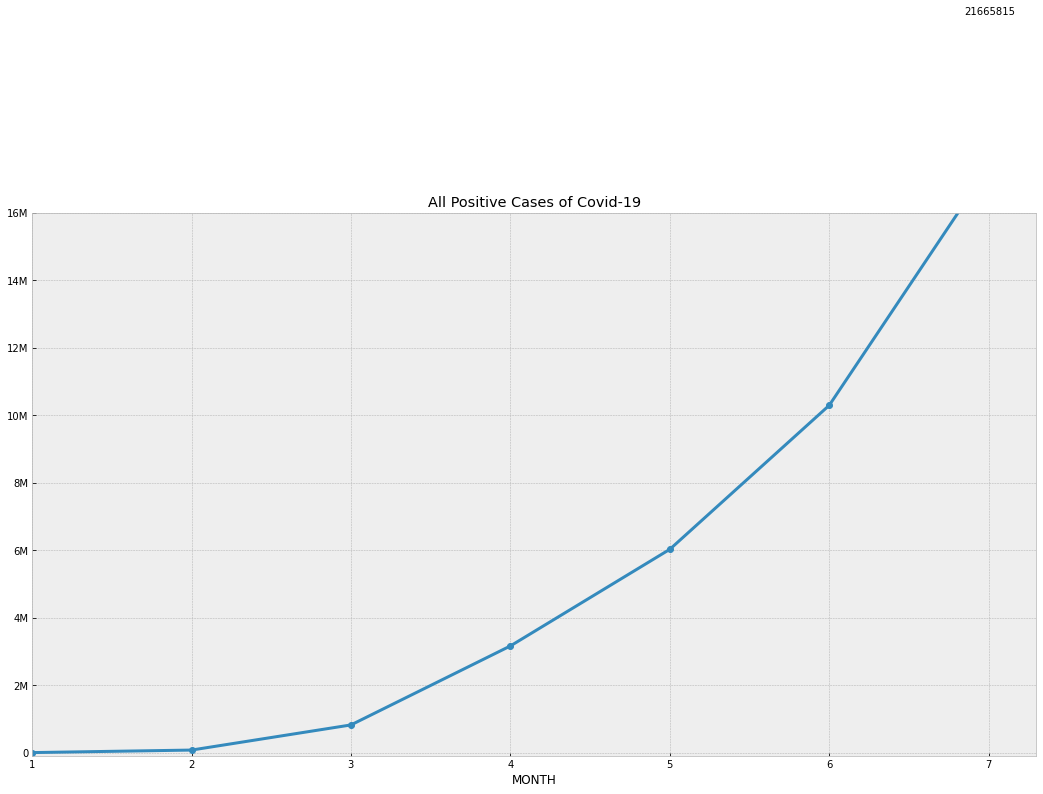

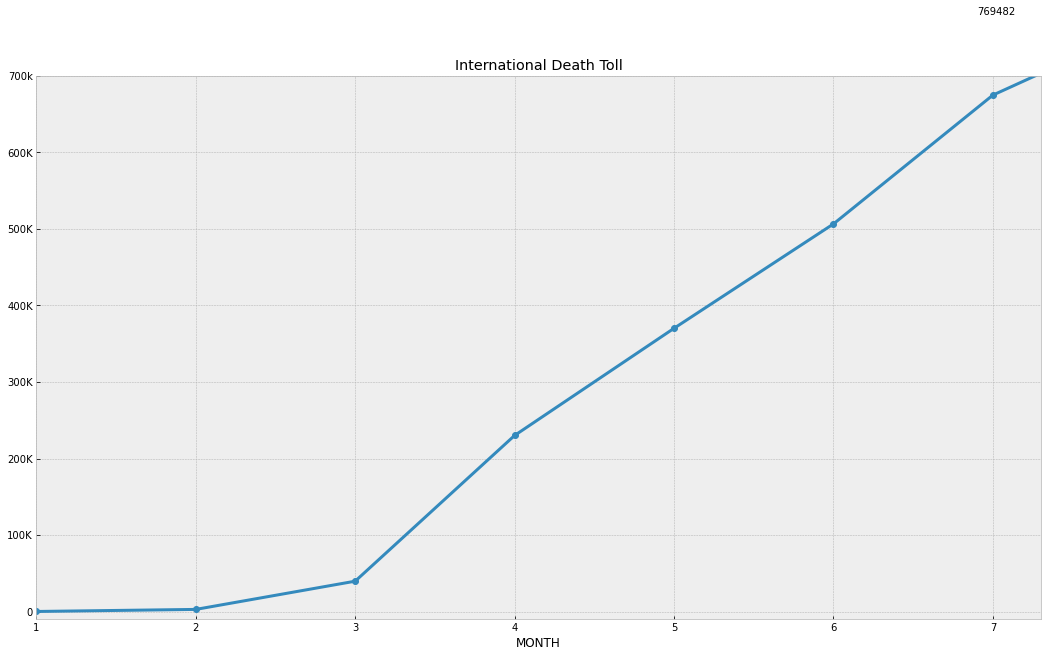

In [24]:
total_all['TOTAL_POSITIVE_CASE'].plot(linewidth=3, marker='o')
plt.title('All Positive Cases of Covid-19')
#setting up y-axis and x-axis of all positive cases
plt.xlim(1, 7.3)
plt.ylim(-100000, 16000000)
yticks = [0, 2000000, 4000000, 6000000, 8000000, 10000000, 12000000, 14000000, 16000000]
ylabels = ['0', '2M', '4M', '6M', '8M', '10M', '12M', '14M', '16M']
plt.yticks(ticks=yticks, labels=ylabels)
y = total_all['TOTAL_POSITIVE_CASE'].max()
plt.text(6.85, y+200000, str(y))
plt.show()

total_all['TOTAL_DEATH'].plot(linewidth=3, marker='o')
plt.title('International Death Toll')
#setting up y-axis and x-axis of death toll
plt.xlim(1, 7.3)
plt.ylim(-10000, 700000)
yticks = [0, 100000, 200000, 300000, 400000, 500000, 600000, 700000]
ylabels = ['0', '100K', '200K', '300K', '400K', '500K', '600K', '700k']
plt.yticks(ticks=yticks, labels=ylabels)
y = total_all['TOTAL_DEATH'].max()
plt.text(6.9, y+10000, str(y))
plt.show()

In [25]:
covid['REPORT_DATE'] = pd.to_datetime(covid['REPORT_DATE'])
covid.sort_values(by='REPORT_DATE', inplace=True)

### Plotting every point

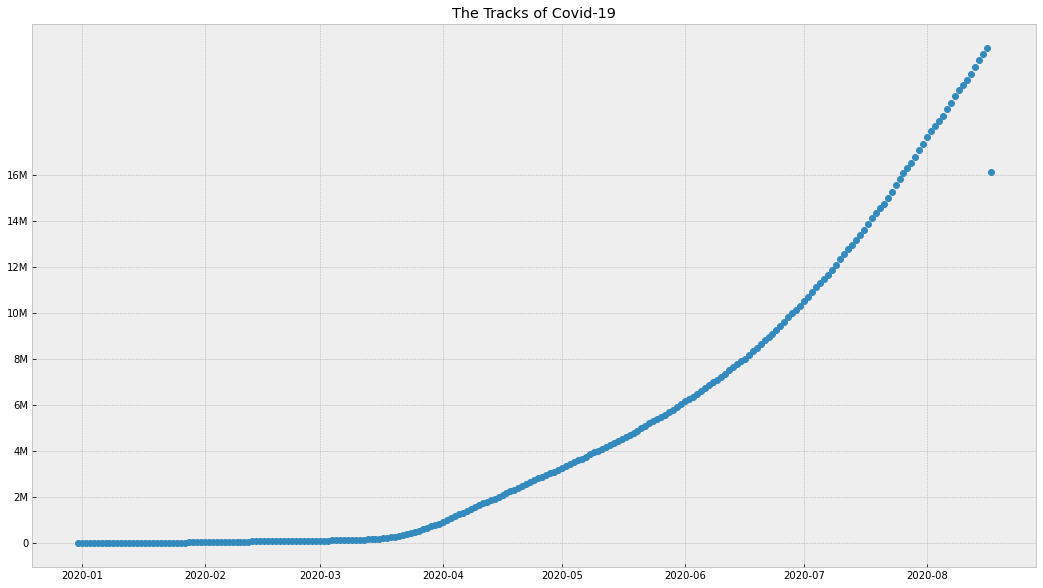

In [26]:
covid_daily = covid.groupby('REPORT_DATE', as_index=False).sum()
plt.plot_date(x=covid_daily['REPORT_DATE'], y=covid_daily['PEOPLE_POSITIVE_CASES_COUNT'])
yticks = [0, 2000000, 4000000, 6000000, 8000000, 10000000, 12000000, 14000000, 16000000]
ylabels = ['0', '2M', '4M', '6M', '8M', '10M', '12M', '14M', '16M']
plt.yticks(ticks=yticks, labels=ylabels)
plt.title('The Tracks of Covid-19')
plt.show()

Why is the last point out of place?

Since this graph is reporting the aggregate of all reported cases in the past, the last point cannot be where it is plotted.

Let's investigate

### Tracking down the problem

In [27]:
print(covid_daily.tail(2))

    REPORT_DATE  PEOPLE_POSITIVE_CASES_COUNT  PEOPLE_DEATH_NEW_COUNT  \
229  2020-08-16                     21497828                    5108   
230  2020-08-17                     16136309                    3607   

     PEOPLE_POSITIVE_NEW_CASES_COUNT  PEOPLE_DEATH_COUNT     YEAR  MONTH  
229                           252798              765879  6805380  26952  
230                           173069              590897   410060   1624  


In [28]:
print(covid.loc[covid['REPORT_DATE']=='2020-07-23']['PEOPLE_POSITIVE_CASES_COUNT'].isnull().sum())
print(covid.loc[covid['REPORT_DATE'].isin(['2020-07-23', '2020-07-22'])]
              [['PEOPLE_POSITIVE_CASES_COUNT', 'CONTINENT_NAME', 'REPORT_DATE']]
              .groupby(['CONTINENT_NAME', 'REPORT_DATE']).sum())

0
                            PEOPLE_POSITIVE_CASES_COUNT
CONTINENT_NAME REPORT_DATE                             
Africa         2020-07-22                        750373
               2020-07-23                        769947
America        2020-07-22                       8027710
               2020-07-23                       8199083
Asia           2020-07-22                       3466104
               2020-07-23                       3538919
Europe         2020-07-22                       2728398
               2020-07-23                       2747153
Oceania        2020-07-22                         13771
               2020-07-23                         14242


In America, cases went from 8026207 to 4037927. Given it happened within a day, the number should've been more like 8037927

Let's see where in America it happened

In [29]:
pd.set_option('display.max_rows', None)
print(covid.loc[(covid['REPORT_DATE'].isin(['2020-07-23', '2020-07-22'])) & (covid['CONTINENT_NAME'] == 'America')]
[['PEOPLE_POSITIVE_CASES_COUNT', 'COUNTRY_SHORT_NAME', 'REPORT_DATE']].groupby(['COUNTRY_SHORT_NAME', 'REPORT_DATE']).sum())

                                               PEOPLE_POSITIVE_CASES_COUNT
COUNTRY_SHORT_NAME                REPORT_DATE                             
Anguilla                          2020-07-22                             3
                                  2020-07-23                             3
Antigua and Barbuda               2020-07-22                            76
                                  2020-07-23                            76
Argentina                         2020-07-22                        130761
                                  2020-07-23                        136105
Aruba                             2020-07-22                           117
                                  2020-07-23                           117
Bahamas                           2020-07-22                           194
                                  2020-07-23                           219
Barbados                          2020-07-22                           106
                         

Everywhere looks fine except the U.S.

It was due to missing 2020-07-23 reports in the U.S.

Since the total on 2020-07-23 is highly affected by this factor, I'm going to graph til 2020-07-22

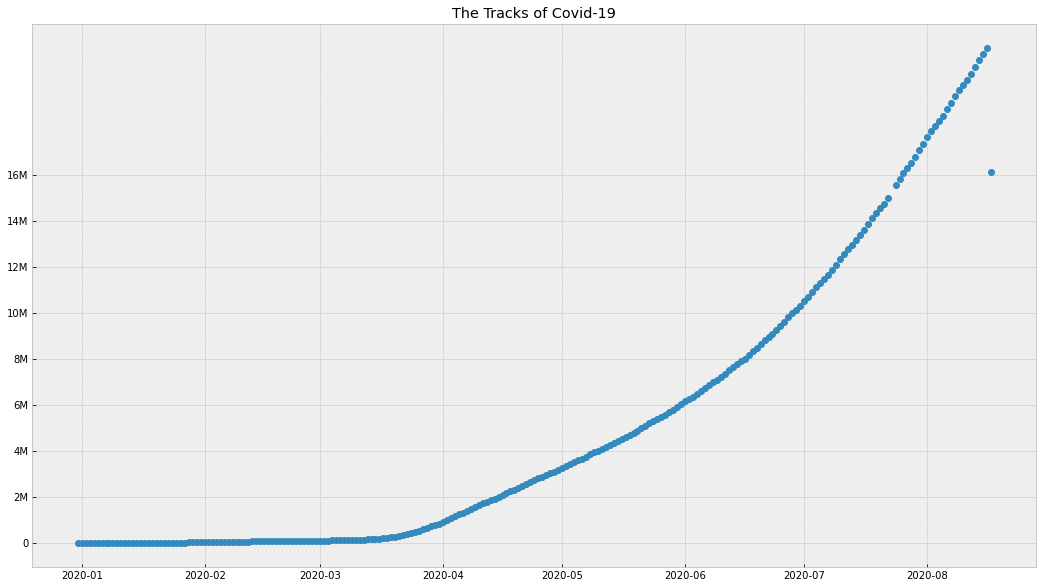

In [30]:
# drop the reports on 2020-07-23
covid_temp = covid.copy()
covid_temp.drop(covid_temp.loc[covid_temp['REPORT_DATE'] == '2020-07-23'].index, inplace=True)
covid_daily = covid_temp.groupby('REPORT_DATE', as_index=False).sum()
plt.plot_date(x=covid_daily['REPORT_DATE'], y=covid_daily['PEOPLE_POSITIVE_CASES_COUNT'])
yticks = [0, 2000000, 4000000, 6000000, 8000000, 10000000, 12000000, 14000000, 16000000]
ylabels = ['0', '2M', '4M', '6M', '8M', '10M', '12M', '14M', '16M']
plt.yticks(ticks=yticks, labels=ylabels)
plt.title('The Tracks of Covid-19')
plt.show()

Now it looks great with no error

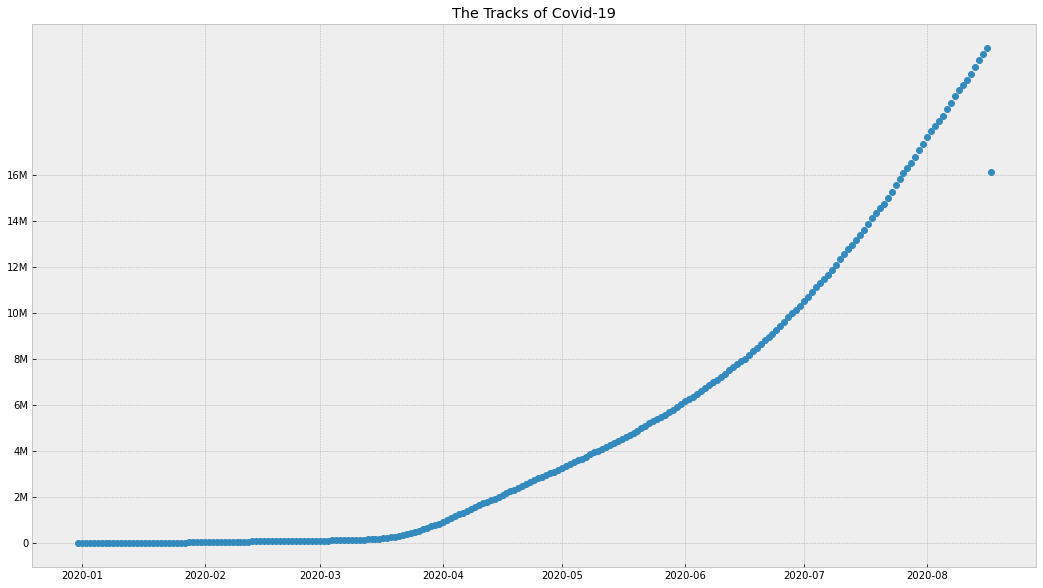

In [33]:
covid_daily = covid.groupby('REPORT_DATE', as_index=False).sum()
covid_daily.drop(covid_temp.loc[covid_temp['REPORT_DATE'] == '2020-07-23'].index, inplace=True)
plt.plot_date(x=covid_daily['REPORT_DATE'], y=covid_daily['PEOPLE_POSITIVE_CASES_COUNT'])
yticks = [0, 2000000, 4000000, 6000000, 8000000, 10000000, 12000000, 14000000, 16000000]
ylabels = ['0', '2M', '4M', '6M', '8M', '10M', '12M', '14M', '16M']
plt.yticks(ticks=yticks, labels=ylabels)
plt.title('The Tracks of Covid-19')
plt.show()